In [1]:
import sys
sys.path.append('../..')
from dataloader import *
from model import *
from train_eval_test import *
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt
import pandas as pd

2024-01-25 14:16:39.475416: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-25 14:16:41.087171: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-25 14:16:44.521731: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.6/lib64:/usr/local/cuda-12.2/lib64
2024-01-25 14:16:44.522820: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror:

In [2]:
torch.manual_seed(0)

## Load data

In [3]:
traffic_data = pd.read_csv('../../data/traffic.csv', header=None).to_numpy()

In [4]:
batch_size = 32
n_train = 12185
n_eval = 1757
n_test = 3509
train_loader, eval_loader, test_loader = get_loaders(traffic_data, batch_size, n_train, n_eval, n_test, T=96, S=96)

## Train 

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
writer = SummaryWriter()

cuda


In [6]:
N = 862 
T = 96 
D = 512 
S = 96 
hidden_dim = 512
num_blocks = 2 

itransformer = iTransformer(N, T, D, S, hidden_dim, num_blocks).to(device)
optimizer = torch.optim.Adam(itransformer.parameters(), lr=1e-3, weight_decay=1e-5) 



In [7]:
loss_values, loss_eval = train(itransformer, optimizer, train_loader, eval_loader, 10, device, writer)

---- epoch :  0
loss train : 0.3996975015080164
loss eval : 0.4298992626942121
---- epoch :  1
loss train : 0.3620610964834375
loss eval : 0.40591590163799435
---- epoch :  2
loss train : 0.35264383224898543
loss eval : 0.4056110554016553
---- epoch :  3
loss train : 0.3470060611685748
loss eval : 0.3970446443328491
---- epoch :  4
loss train : 0.34211601726907903
loss eval : 0.3888039875489015
---- epoch :  5
loss train : 0.33955375046011
loss eval : 0.388210633626351
---- epoch :  6
loss train : 0.33640094353723776
loss eval : 0.38644613382908016
---- epoch :  7
loss train : 0.3373416181279238
loss eval : 0.38852117783748186
---- epoch :  8
loss train : 0.3336621541825552
loss eval : 0.38206239617787874
---- epoch :  9
loss train : 0.3323294334310703
loss eval : 0.38456937957268494


## Test

In [8]:
loss_test, loss_mae, target, yhat = test(itransformer, test_loader, device)
print("MSE : ", loss_test)
print("MAE : ", loss_mae)

MSE :  0.42603572515340954
MAE :  0.30145224556326866


Affichage pour une modalité sur toute la durée de la prédiction

Affichage de toutes les modalités à un instant t

In [9]:
j = 5

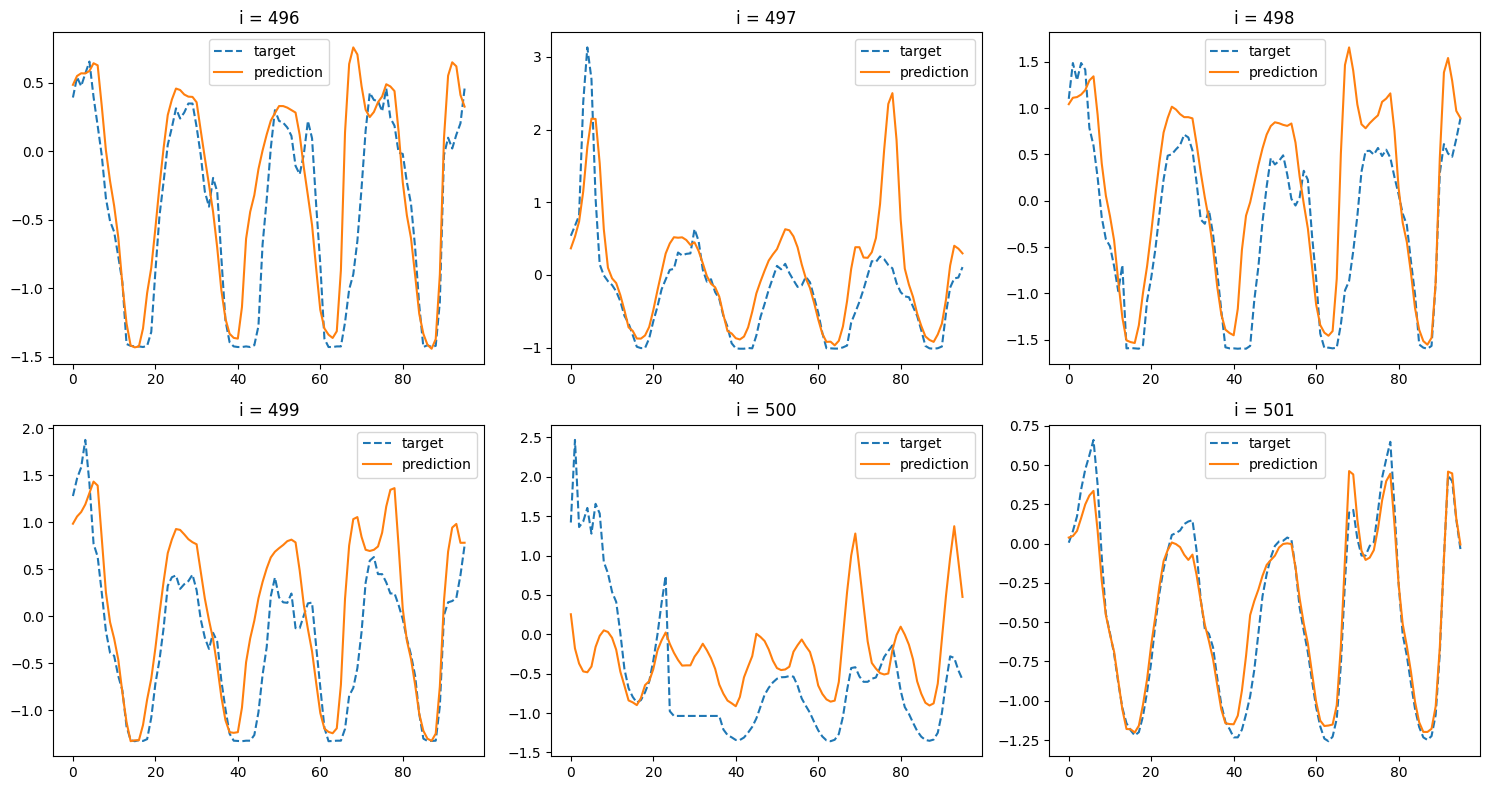

In [10]:
plt.figure(figsize=(15, 8))

for i in range(1, 7):
    plt.subplot(2, 3, i)
    current_i = i + 495
    
    plt.plot(target[j, :, current_i].to("cpu"), "--", label="target")
    plt.plot(yhat[j, :, current_i].to("cpu"), label="prediction")
    
    plt.title(f"i = {current_i}")
    plt.legend()

plt.tight_layout()
plt.show()

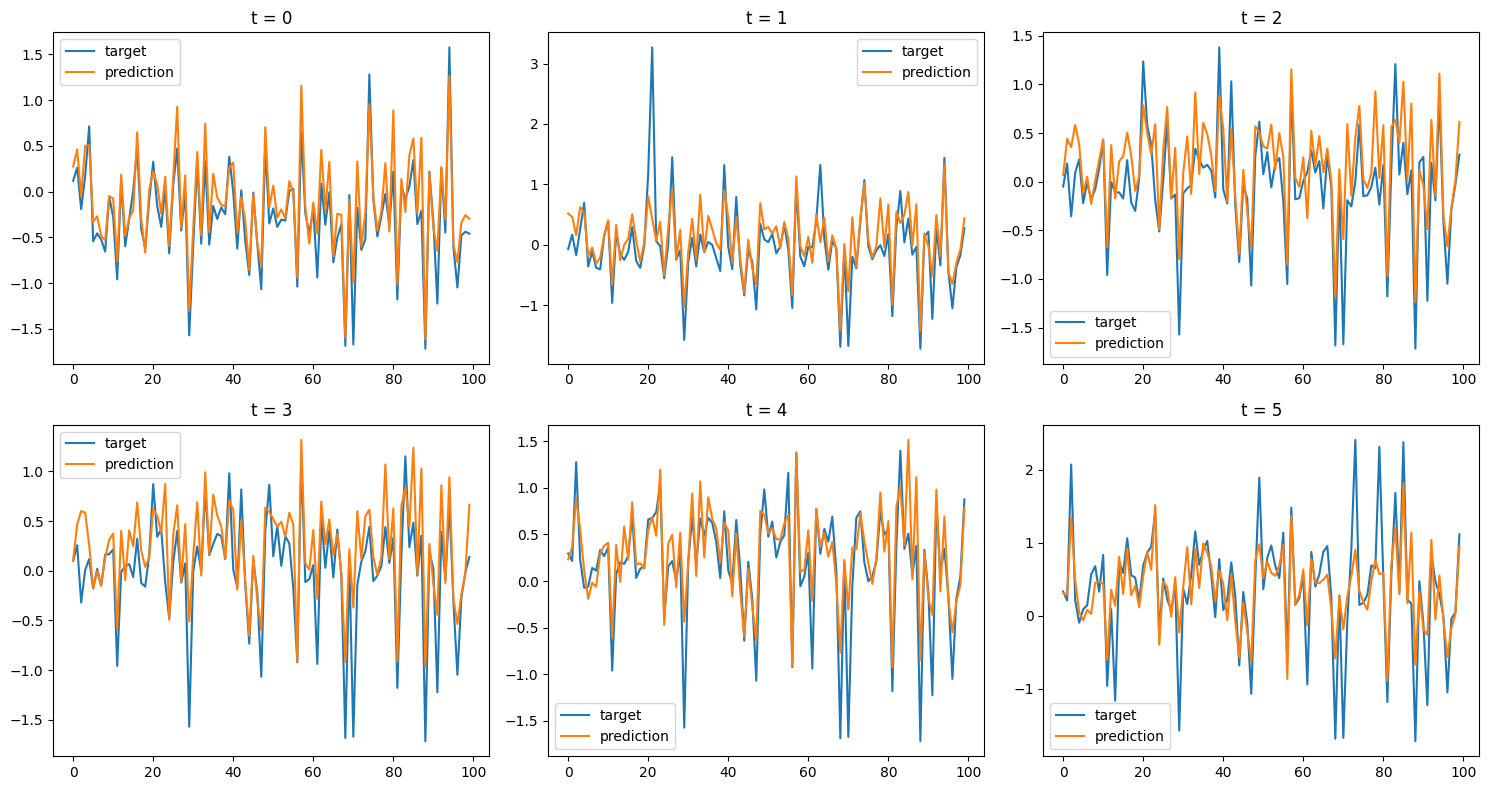

In [11]:
plt.figure(figsize=(15, 8))

for i in range(1, 7):
    plt.subplot(2, 3, i)
    
    current_i = i-1
    
    plt.plot(np.arange(len(target[1, current_i, :100])), target[0, current_i, :100].cpu(),  label="target")
    plt.plot(np.arange(len(target[1, current_i, :100])), yhat[0, current_i, :100].cpu(),  label="prediction")

    plt.title(f"t = {current_i}")
    plt.legend()

plt.tight_layout()
plt.show()

### Save figures

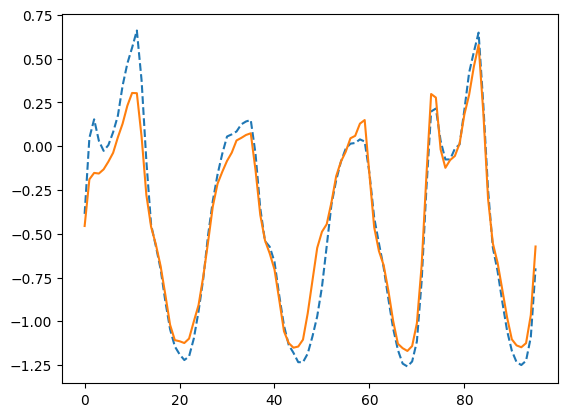

In [15]:
plt.figure()
plt.plot(target[0, :, 501].to("cpu"), "--", label="target")
plt.plot(yhat[0, :, 501].to("cpu"), label="prediction")
plt.savefig("traffic_time_predict.pdf")


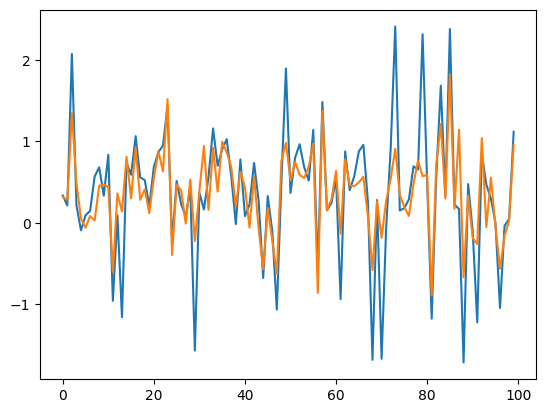

In [16]:
plt.figure()
plt.plot(np.arange(len(target[1, 0, :100])), target[0, current_i, :100].cpu(),  label="target")
plt.plot(np.arange(len(target[1, 0, :100])), yhat[0, current_i, :100].cpu(),  label="prediction")
plt.savefig("traffic_modality_predict.pdf")
